<a href="https://colab.research.google.com/github/grgrbu/ML-bioinf/blob/main/%D0%91%D1%83%D0%BA%D0%BB%D0%B5%D0%B9_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Analysis and prediction of super-enhancers
 ____

Filled notebook without tasks = 5 points

Additional tasks = 15 points (+5 Bonus)

 
# Intoduction


In the notebook the super-enhancers prediction is made by means of classical Machine Learning Models.

The notebook was made based on the article [Analysis and prediction of super-enhancers using sequence and chromatin signatures](https://www.biorxiv.org/content/10.1101/105262v1.full) and appropriate [github repository](https://github.com/asntech/improse).

## Biology problem statement

### Background

![](https://www.genome.gov/sites/default/files/tg/en/illustration/nucleosome.jpg)

![](https://www.extremetech.com/wp-content/uploads/2015/09/Histone2.jpg)

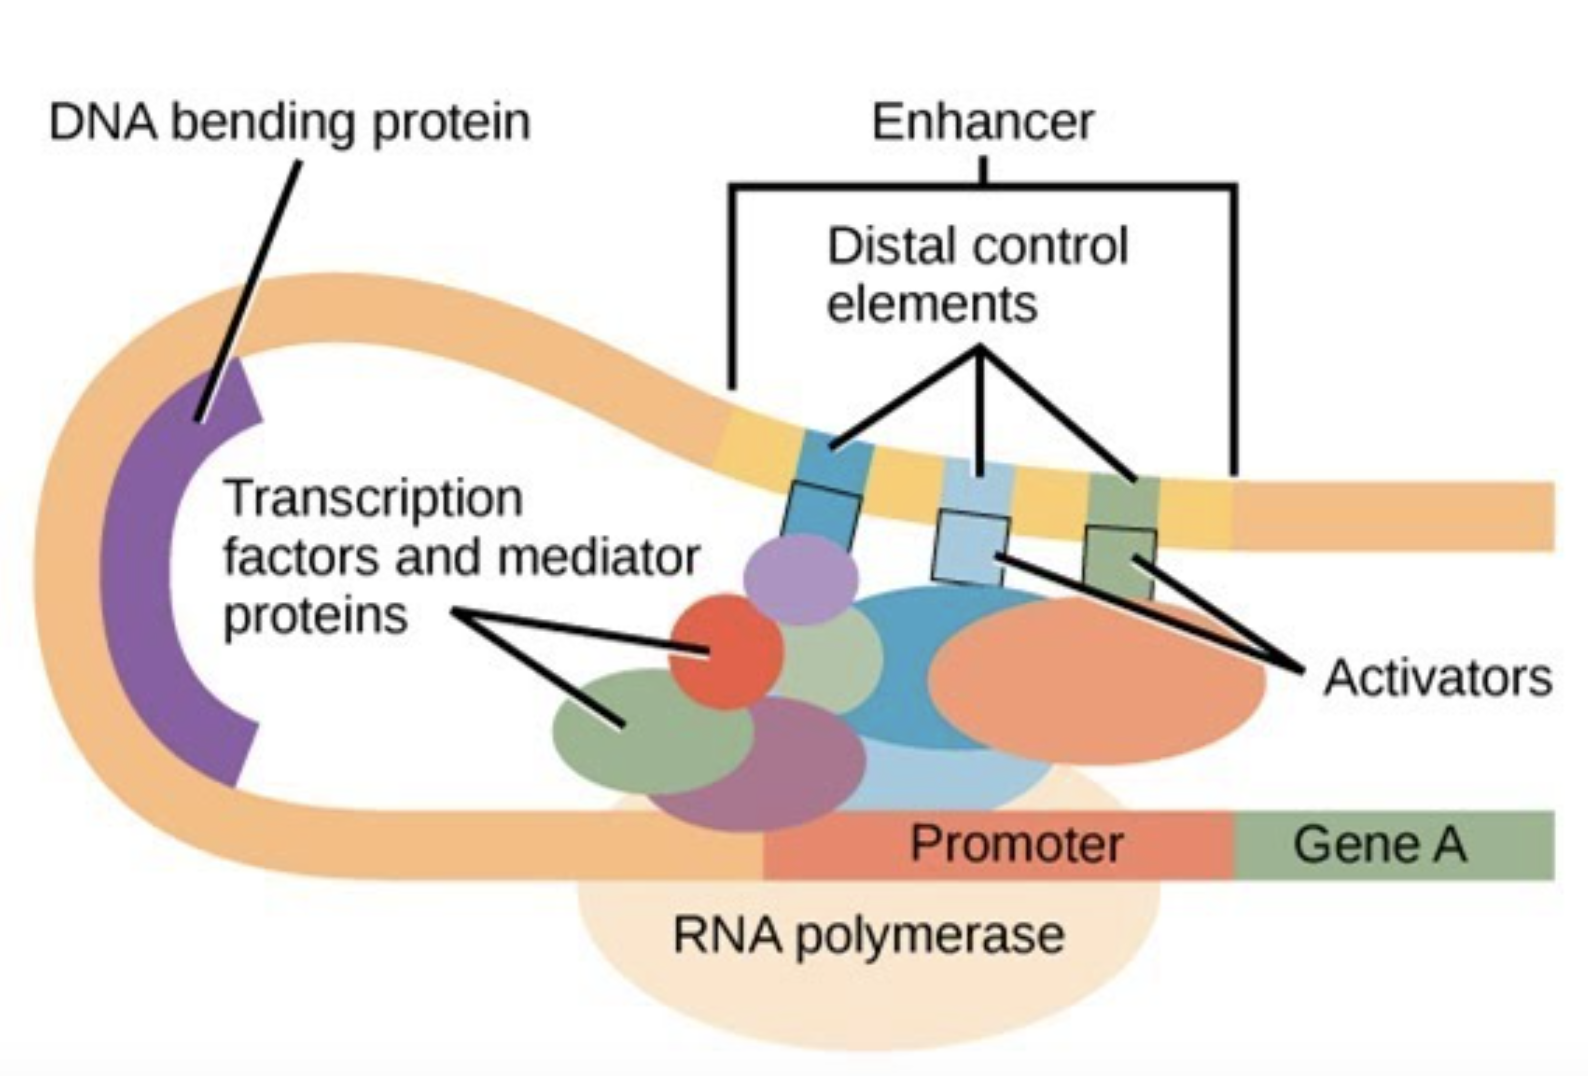

In genetics, an enhancer is a short (50–1500 bp) region of DNA that can be bound by proteins (activators) to increase the likelihood that transcription of a particular gene will occur.

A myriad of transcription factors bind to enhancers and regulate gene expression by recruiting coactivators and RNA polymerase II to target genes.

### What is super-enhancers and why care?

DNA enhancers regions have been
identified and classified into **super-enhancers (SEs)** and **typical enhancers (TEs)** by using ChIP-seq
signal. 

**Super-enhancers** form clusters of active enhancers, are celltype specific, associated with key cell identity genes, and linked to many biological processes which
define the cell identity. These **super-enhancers** are densely loaded with the Mediator complex,
master transcription factors and chromatin regulators. Many disease- and trait-associated
single nucleotide polymorphisms (SNPs) have been found in these regions. 

**Super-enhancers**
differ from **typical enhancers** in terms of size, ChIP-seq density of various cofactors, DNA motif
content, DNA methylation level, enhancer RNA (eRNA) abundance, ability to activate transcription
and sensitivity to perturbation. Further, studies have found super-enhancers in
multiple cancers and demonstrated their importance in cellular-identity and disease and emphasized
their use as potential biomarkers.

### What is problem?

ChIP-seq data
for MED1 - part of Mediator complex working with RNA polymerase II optimally differentiated super-enhancers and typical enhancers by comparing it with
enhancer marks, including **H3K27ac**, **H3K4me1** and **DNase I** hypersensitivity. **BRD4**, a member
of the BET protein family, was also used to distinguish super-enhancers from typical enhancers as it
is highly correlated with MED1. **H3K27ac** was extensively used to create a catalogue of super-enhancers across 86 different human cell-types and tissues due to its availability. Other studies
used the coactivator protein **P300** to define super-enhancers.

However, the knowledge about
these factors’ ability to define a set of super-enhancers in a particular cell-type and their relative and
combinatorial importance remains limited. Master transcription factors which might form the super-enhancer domains are largely unknown for most of the cell-types, while performing ChIP-seq for the
Mediator complex is difficult and costly.

Machine Learning methods are able to model such complex dependencies between enhancer's type and external factors.

## Machine Learning Problem Statement

Binary classification task - predict class of the enhancer (0 - typical enhancer and 1 - super enhancer) based on the set of features - external factors of the enhancer's environment.



**Dataset description**

10020 rows, 39 features. Target variable - **Class**.

| Feature        | Description           |
| :------------- |:-------------|
|chrom|number of chromatin|
|start, end| number of the first and the last nucleotide|
| H3K27ac, H3K4me1,  H3K4me3, H3K9me3     | histone modifications | 
|Med12, Cdk8|sub-units of Mediator complex|
| Cdk9      |  P-TFEb subunit      |
|p300, CBP| transcriptional co-activating proteins |
|Pol2| RNA polymerase II|
|Lsd1, Mi2b|subunits of Lsd1-NuRD complex|
|Brg1, Brd4, CHD7|other chromatin regulators|
|Smc1, Nipbl| Cohesin|
|Oct4, Sox2, Nanog, Esrrb, Klf4, Tcfcp2l1, Prdm14, Nr5a2, Smad3, Stat3 and Tcf3| transcription factors|
|DNaseI|DNA hypersensitive site|
|HDAC, HDAC2|enzymes that remove acetyl groups from an amino acid on a histone|
|AT_content|content of A and T nucleotides|
|GC_content|content of C and G nucleotides|
|phastConsP, phastCons|probability that each nucleotide belongs to a conserved element (from HMM prediction model)|
|repeat_fraction| - |
|length|number of nucleotides|

# Content
_____

1. Getting familiar with gene expression datasets
2. Using the Machine Learning Models pipeline for model construction
3. Apply different metrics and models interpretation algorithms

In [2]:
import pandas as pd

#1. Data preprocessing

1. Get information about data type and missing values
2. Visualize data
3. Split data
4. Check balance of classes

In [3]:
!wget https://raw.githubusercontent.com/asntech/improse/master/improse/data/original_data.csv

--2021-04-13 19:37:27--  https://raw.githubusercontent.com/asntech/improse/master/improse/data/original_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2695171 (2.6M) [text/plain]
Saving to: ‘original_data.csv’

original_data.csv   100%[===================>]   2.57M  --.-KB/s    in 0.1s    

2021-04-13 19:37:27 (19.0 MB/s) - ‘original_data.csv’ saved [2695171/2695171]



In [4]:
data = pd.read_csv('original_data.csv')

In [5]:
data.head()

,chrom,start,end,Class,H3K27ac,H3K4me1,H3K4me3,H3K9me3,Brd4,Cdk8,Cdk9,Med12,p300,CBP,Pol2,Lsd1,Brg1,Smc1,Nipbl,Mi2b,CHD7,HDAC2,HDAC,DNaseI,Oct4,Sox2,Nanog,Smad3,Stat3,Tcf3,Esrrb,Klf4,Prdm14,Tcfcp2I1,Nr5a2,AT_content,GC_content,phastCons,phastConsP,repeat_fraction,length
0,chr1,13049615,13050323,SE,0.2018,1.4146,0.0749,0.1198,0.7075,0.6613,0.7682,0.8354,0.0358,0.1222,0.0898,0.8594,0.0000,0.6773,0.2392,0.7762,0.7901,0.1730,0.3476,0.5999,2.4071,2.2322,1.8300,0.5358,0.0000,0.8796,0.0417,0.4839,1.5489,0.8829,0.1934,0.552260,0.447740,0.057415,0.057417,0.810734,708
1,chr1,13061206,13061924,SE,0.1342,0.4785,0.5477,0.2809,0.4630,1.6258,0.7081,0.8529,0.5809,1.3746,0.8735,1.0980,0.0705,0.3754,0.3475,0.6892,0.3853,0.3133,0.6304,0.2564,0.4925,0.5034,0.4613,0.1620,0.1074,0.0472,0.4979,0.0315,0.1724,0.1641,0.0000,0.572423,0.427577,0.128439,0.128439,0.738162,718
2,chr1,13063645,13065360,SE,0.6214,0.7748,0.1633,0.0000,1.5622,2.5607,1.1498,1.7954,1.6155,3.2193,0.5454,1.7183,0.4530,0.2651,0.4961,1.1575,2.3542,1.3007,0.6111,1.3063,4.9473,5.2589,4.0920,2.4792,0.0971,1.6501,1.9990,0.1867,5.2407,0.0000,0.2011,0.592420,0.407580,0.220057,0.230713,0.092711,1715
3,chr1,13071010,13071067,SE,0.9484,1.8778,0.0000,0.0000,0.8669,1.8424,0.8190,0.3580,0.1219,0.0000,0.0000,0.7964,0.7342,0.0000,0.0000,0.6520,1.2893,0.0698,0.2058,0.4211,0.3392,0.0000,0.0000,0.6964,0.0000,0.2754,1.5431,0.0000,1.0517,0.2885,0.4231,0.649123,0.350877,0.050386,0.050386,0.000000,57
4,chr1,13074460,13075741,SE,1.1076,0.7386,0.0000,0.0000,3.2876,3.8653,1.8325,5.3923,1.5005,6.7089,0.4789,2.9671,0.9055,0.5792,0.9231,1.6583,1.9375,1.5435,1.0639,2.7914,2.5468,4.2270,10.1784,4.1359,0.5906,2.1521,1.5641,2.3268,63.2990,34.6054,0.1112,0.548009,0.451991,0.054896,0.054997,0.231850,1281


In [6]:
TARGET_COLUMN ='Class'
CATEG_FEATURES = ['chrom']
CV_SPLITS = 10
SMOTE_K_NEIGHBOURS = 5

In [7]:
data.dropna()

,chrom,start,end,Class,H3K27ac,H3K4me1,H3K4me3,H3K9me3,Brd4,Cdk8,Cdk9,Med12,p300,CBP,Pol2,Lsd1,Brg1,Smc1,Nipbl,Mi2b,CHD7,HDAC2,HDAC,DNaseI,Oct4,Sox2,Nanog,Smad3,Stat3,Tcf3,Esrrb,Klf4,Prdm14,Tcfcp2I1,Nr5a2,AT_content,GC_content,phastCons,phastConsP,repeat_fraction,length
0,chr1,13049615,13050323,SE,0.2018,1.4146,0.0749,0.1198,0.7075,0.6613,0.7682,0.8354,0.0358,0.1222,0.0898,0.8594,0.0000,0.6773,0.2392,0.7762,0.7901,0.1730,0.3476,0.5999,2.4071,2.2322,1.8300,0.5358,0.0000,0.8796,0.0417,0.4839,1.5489,0.8829,0.1934,0.552260,0.447740,0.057415,0.057417,0.810734,708
1,chr1,13061206,13061924,SE,0.1342,0.4785,0.5477,0.2809,0.4630,1.6258,0.7081,0.8529,0.5809,1.3746,0.8735,1.0980,0.0705,0.3754,0.3475,0.6892,0.3853,0.3133,0.6304,0.2564,0.4925,0.5034,0.4613,0.1620,0.1074,0.0472,0.4979,0.0315,0.1724,0.1641,0.0000,0.572423,0.427577,0.128439,0.128439,0.738162,718
2,chr1,13063645,13065360,SE,0.6214,0.7748,0.1633,0.0000,1.5622,2.5607,1.1498,1.7954,1.6155,3.2193,0.5454,1.7183,0.4530,0.2651,0.4961,1.1575,2.3542,1.3007,0.6111,1.3063,4.9473,5.2589,4.0920,2.4792,0.0971,1.6501,1.9990,0.1867,5.2407,0.0000,0.2011,0.592420,0.407580,0.220057,0.230713,0.092711,1715
3,chr1,13071010,13071067,SE,0.9484,1.8778,0.0000,0.0000,0.8669,1.8424,0.8190,0.3580,0.1219,0.0000,0.0000,0.7964,0.7342,0.0000,0.0000,0.6520,1.2893,0.0698,0.2058,0.4211,0.3392,0.0000,0.0000,0.6964,0.0000,0.2754,1.5431,0.0000,1.0517,0.2885,0.4231,0.649123,0.350877,0.050386,0.050386,0.000000,57
4,chr1,13074460,13075741,SE,1.1076,0.7386,0.0000,0.0000,3.2876,3.8653,1.8325,5.3923,1.5005,6.7089,0.4789,2.9671,0.9055,0.5792,0.9231,1.6583,1.9375,1.5435,1.0639,2.7914,2.5468,4.2270,10.1784,4.1359,0.5906,2.1521,1.5641,2.3268,63.2990,34.6054,0.1112,0.548009,0.451991,0.054896,0.054997,0.231850,1281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015,chr18,76832964,76833528,TE,0.3865,0.2178,0.0000,0.0000,0.4477,0.6599,0.4202,0.5409,0.3363,0.3667,0.0592,0.3259,0.3540,0.3054,0.2320,0.6745,0.2457,0.2642,0.3654,0.4431,1.0283,0.6135,1.0061,0.6159,0.1290,2.0361,0.1772,0.1842,1.9080,0.1139,0.0000,0.565603,0.434397,0.020204,0.020204,0.051418,564
10016,chr18,76833924,76834464,TE,0.5616,0.3867,0.0425,0.8427,1.4914,1.6630,1.0828,2.5015,4.1018,2.5341,0.6239,1.8115,0.2267,0.7389,0.9130,1.1781,0.9411,0.7190,0.7477,0.8265,0.6578,1.0523,0.8458,3.9892,0.5499,1.2226,0.6700,0.4702,1.8830,0.3013,0.2002,0.477778,0.522222,0.362505,0.395681,0.057407,540
10017,chr18,76834846,76835327,TE,0.6197,0.7589,0.1468,0.0000,0.8867,0.8208,0.4900,1.6985,0.2991,1.7477,0.2076,0.7299,0.0000,0.0000,0.0068,0.5128,0.2404,0.1975,0.6150,0.4372,0.5471,0.5805,0.6501,0.9349,0.4206,0.6786,0.3900,0.2163,4.1193,0.0956,0.0000,0.544699,0.455301,0.379287,0.403342,0.000000,481
10018,chr18,76931680,76932478,TE,0.0000,0.1024,0.0000,0.0000,0.2146,0.1972,0.2762,0.2528,0.0532,0.0255,0.0616,0.3905,0.0991,0.0000,0.0457,0.5227,0.1792,0.4592,0.1468,0.5542,0.8901,0.9244,0.8103,0.6025,0.1016,0.1981,0.2267,0.2808,0.8869,0.0367,0.0883,0.557644,0.442356,0.030260,0.036487,0.540100,798


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0386660550>,
      dtype=object)

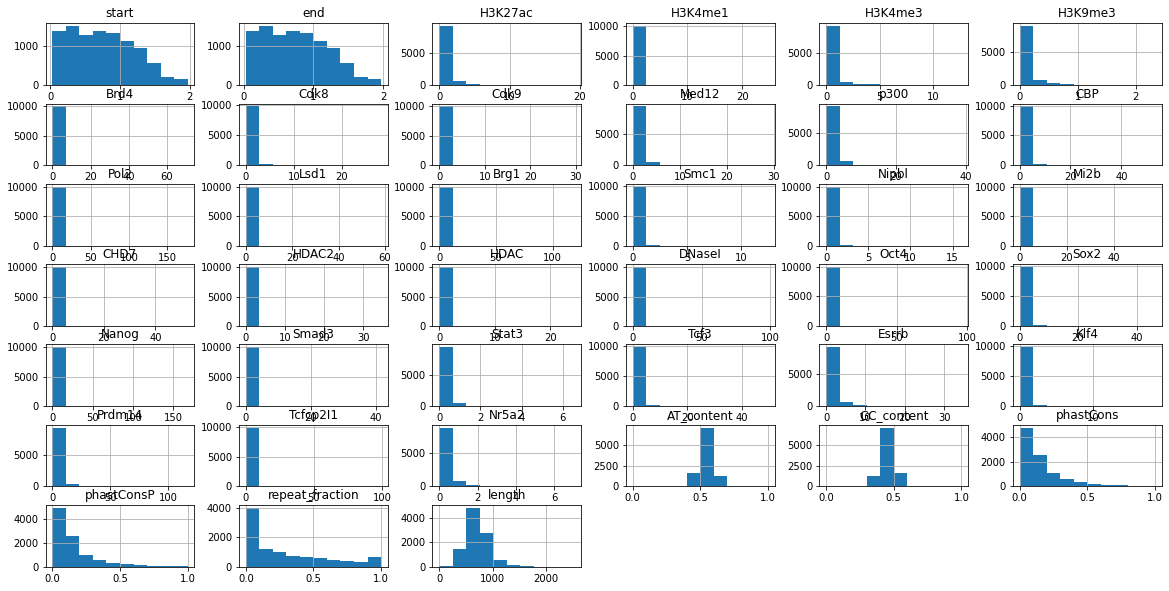

In [8]:
data.hist(figsize=(20, 10))

In [9]:
# Split data
from sklearn.model_selection import train_test_split, StratifiedKFold

y = data[TARGET_COLUMN].map({'TE': 0, 'SE': 1})
X = data.drop(columns = [TARGET_COLUMN]+CATEG_FEATURES)

X_train_val,  X_test, y_train_val, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42, shuffle = True, stratify = None)

skf = StratifiedKFold(n_splits=CV_SPLITS,  random_state=42, shuffle=True)

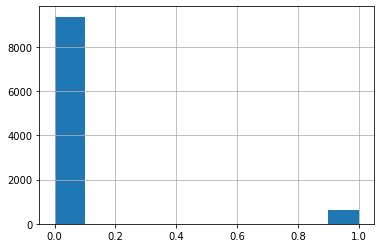

In [10]:
y.hist()

#### Task 1 (3 points)

Encode `CATEG_FEATURES` during preprocessing and compare results of the models with/without this feature. 
What type of encoding is it better to use?

# 2. Create model

1. Fix class imbalance
2. Optimize model's hyperparameters
3. Train RandomForest model with cross-validation
4. Check ROC-AUC score for the model with best parameters

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

In [12]:
def get_model(model):
    '''
    Get the model from six stat-of-the-art machine learning models.
    '''
    if model=='svm':
        from sklearn.svm import SVC
        names = ["Linear SVM"]
        classifiers = [
        SVC()    
        ]
    elif model=='ab':
        from sklearn.ensemble import AdaBoostClassifier
        names = ["AdaBoost"]
        classifiers = [
        AdaBoostClassifier() 
        ]
    elif model=='knn':
        from sklearn.neighbors import KNeighborsClassifier
        names = ["K-Nearest Neighbors"]
        classifiers = [
        KNeighborsClassifier()
        ]
    elif model=='dt':
        from sklearn.tree import DecisionTreeClassifier
        names = ["Decision Tree"]
        classifiers = [
        DecisionTreeClassifier()   
        ]
    elif model=='nb':
        from sklearn.naive_bayes import GaussianNB
        names = ["Naive Bayes"]
        classifiers = [
         GaussianNB()   
        ]
    else:
        from sklearn.ensemble import RandomForestClassifier
        names = ["Random Forest"]
        classifiers = [
        RandomForestClassifier()
        ]
    
    return classifiers

In [13]:
model = get_model('dt')[0]
parameters = {'model__max_depth':(3, 5, 7)}
over = SMOTE(sampling_strategy=0.1, k_neighbors=SMOTE_K_NEIGHBOURS)
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
clf = GridSearchCV(pipeline, parameters, scoring='roc_auc', cv=skf, n_jobs=-1)
_ = clf.fit(X_train_val, y_train_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [14]:
clf.best_params_

{'model__max_depth': 5}

In [15]:
best_model = DecisionTreeClassifier(max_depth = 5)
steps = [('over', over), ('model', best_model)]
pipeline = Pipeline(steps=steps)
_ = pipeline.fit(X_train_val, y_train_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [16]:
y_test_pred_proba = pipeline[1].predict_proba(X_test)[:,1]

In [17]:
print('Test ROC AUC for the best model %.2f' % roc_auc_score(y_test, y_test_pred_proba))

Test ROC AUC for the best model 0.86


In [18]:
# Add SMOTE k_neighbours parameter to the search grid
model = get_model('dt')[0]
parameters = {'model__max_depth':(3, 5, 7), 'over__k_neighbors': (5, 10)}
over = SMOTE(sampling_strategy=0.1)
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
clf = GridSearchCV(pipeline, parameters, scoring='roc_auc', cv=skf, n_jobs=-1)
_ = clf.fit(X_train_val, y_train_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [19]:
# Optimize Random Forest model
model = get_model('Random Forest')[0]
parameters = {'model__max_depth':(3, 5, 7), 'model__n_estimators': (100, 200), 'over__sampling_strategy': (0.1, 0.8)}
over = SMOTE(k_neighbors=SMOTE_K_NEIGHBOURS)
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
clf = GridSearchCV(pipeline, parameters, scoring='roc_auc', cv=skf, n_jobs=-1)
_ = clf.fit(X_train_val, y_train_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [20]:
clf.best_params_

{'model__max_depth': 7,
 'model__n_estimators': 200,
 'over__sampling_strategy': 0.1}

In [28]:
best_model = RandomForestClassifier(max_depth = 7, n_estimators = 200)
over = SMOTE(sampling_strategy=0.1, k_neighbors=SMOTE_K_NEIGHBOURS)
steps = [('over', over), ('model', best_model)]
pipeline = Pipeline(steps=steps)
_ = pipeline.fit(X_train_val, y_train_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Task 2 (9 points)

Try other models from the list of SOTA models and fit the set of parameters.

* Add needed preprocessing steps (3 points)

* What assumptions do you need to check before using NB classifier? (2 points)

* Try to use XGBoost model,  optimize it parameters. (3 points)

(Consider using XGBoost with GPU - https://xgboost.readthedocs.io/en/latest/gpu/index.html)

* What model has the best test score? (1 point)



#3. Model interpretation

Plot feature importance for the RandomForest Model

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
importances = best_model.feature_importances_

indices = np.argsort(importances)[::-1]

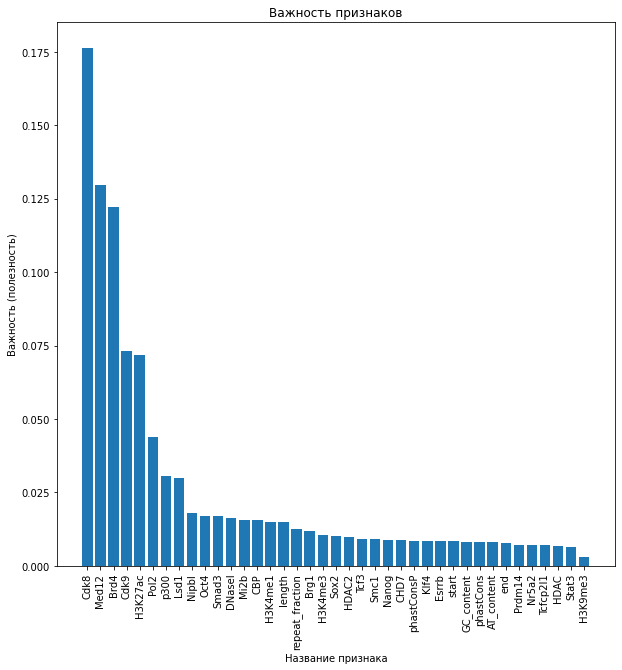

In [31]:
plt.figure(figsize=(10, 10))

plt.title('Важность признаков')
plt.ylabel('Важность (полезность)')
plt.xlabel('Название признака')

plt.bar(range(len(X_test.columns)), importances[indices])
plt.xticks(range(len(X_test.columns)),X_test.columns[indices],rotation=90)
plt.show()

#### Task 3 (3 points)

* Get feature importances for the best XGBoost model and compare results with RandomForest importances. (2 points)

* Compare results with the importances from the [original article](https://www.biorxiv.org/content/10.1101/105262v1.full) (1 point)



#### Bonus Task (5 points)

Create additional analysis of the results/initial data (you can choose some of the analysis steps from the [original article](https://www.biorxiv.org/content/10.1101/105262v1.full)).

You can use additional sources like [Genome Browser](https://artyomovlab.wustl.edu/jbr/2018_h3k27ac_aging/).

![](https://www.biorxiv.org/content/biorxiv/early/2017/02/02/105262/F4.large.jpg?width=800&height=600&carousel=1)